# Wordcloud for Linkedin

import modules 

In [31]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import random
import nltk

Reading the text file

In [32]:
path = "C:/Users/vigne/OneDrive/Documents/GitHub"
os.chdir(path)

fileName = input("Please enter text file name: ")
with open(fileName, 'r') as file:
    text = file.read().replace('\n', ' ')

print(text)

Please enter text file name: DataScience_Word_Cloud.txt
Data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.  Data science is related to data mining, machine learning and big data.  Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data).  The field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization.   As such it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication and business.  Python is a programming language with simple syntax that is commonly used for data science.  There are a number of python libraries that are used in data science including numpy, pandas, and scipy.  R is a programming language that was designed 

Process the text

In [33]:
#convert the text to lower case
text = text.lower()

In [34]:
text

'data science is an inter-disciplinary field that uses scientific methods, processes, algorithms and systems to extract knowledge and insights from many structural and unstructured data.  data science is related to data mining, machine learning and big data.  data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data).  the field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization.   as such it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication and business.  python is a programming language with simple syntax that is commonly used for data science.  there are a number of python libraries that are used in data science including numpy, pandas, and scipy.  r is a programming language that was designed for statisticians and data mining and is optimized for 

In [35]:
# define words that are to be ignored in the word cloud
stopwords = set(STOPWORDS)

In [37]:
stopwords.update(["project","use","facebbok", 'hospital', 'bi', 'diagnosis'])

In [38]:
from nltk.tokenize import word_tokenize
words = word_tokenize(text)

In [39]:
words

['data',
 'science',
 'is',
 'an',
 'inter-disciplinary',
 'field',
 'that',
 'uses',
 'scientific',
 'methods',
 ',',
 'processes',
 ',',
 'algorithms',
 'and',
 'systems',
 'to',
 'extract',
 'knowledge',
 'and',
 'insights',
 'from',
 'many',
 'structural',
 'and',
 'unstructured',
 'data',
 '.',
 'data',
 'science',
 'is',
 'related',
 'to',
 'data',
 'mining',
 ',',
 'machine',
 'learning',
 'and',
 'big',
 'data',
 '.',
 'data',
 'science',
 'is',
 'an',
 'interdisciplinary',
 'field',
 'focused',
 'on',
 'extracting',
 'knowledge',
 'from',
 'data',
 'sets',
 ',',
 'which',
 'are',
 'typically',
 'large',
 '(',
 'see',
 'big',
 'data',
 ')',
 '.',
 'the',
 'field',
 'encompasses',
 'analysis',
 ',',
 'preparing',
 'data',
 'for',
 'analysis',
 ',',
 'and',
 'presenting',
 'findings',
 'to',
 'inform',
 'high-level',
 'decisions',
 'in',
 'an',
 'organization',
 '.',
 'as',
 'such',
 'it',
 'incorporates',
 'skills',
 'from',
 'computer',
 'science',
 ',',
 'mathematics',
 ',',
 

In [40]:
# pos tagging
tags = nltk.pos_tag(words)

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [41]:
# lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
lemWords = []
for i in range(len(words)):
    word = words[i]
    tag = tags[i][1]
    if 'VB' in tag:
        lemWord = lem.lemmatize(word, "v")
    elif tag == "PRP":
        lemWord = word
    else:
        lemWord = lem.lemmatize(word)
    lemWords.append(lemWord)

finalText = ' '.join(lemWords)

create the word cloud

In [62]:
wordcloud = WordCloud(width = 1584, height = 396, 
                background_color ='black',
                min_font_size = 5,
                stopwords = stopwords,
                random_state = 42).generate(finalText) 

In [63]:
def grey_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

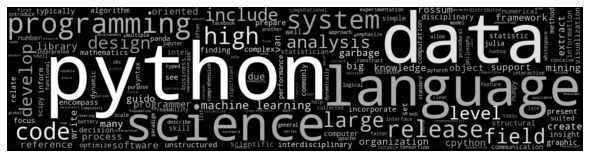

In [64]:
plt.figure(figsize = (8, 2), facecolor = None) 
plt.imshow(wordcloud)
plt.imshow(wordcloud.recolor(color_func = grey_color_func, random_state = 3), interpolation = "bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("wordcloud.png")
plt.show()